In [2]:
import pandas as pd 
from glob import glob
import os
import office365
import requests
import pyarrow as pa
import pyarrow.parquet as pq

import warnings
warnings.filterwarnings("ignore")

In [3]:
# path = "D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"
# f = glob("Dthu\*csv")
# files_Dthu_parquet = glob(os.path.join(path, "dthu_parquet_files\\*.parquet"))
# files_CP = glob(os.path.join(path, "CP\\*.csv"))
# files_Others = glob(os.path.join(path, "Others\\*.csv"))
# files_SLBan = glob(os.path.join(path, "SLBan\\*.csv"))
# files_TK = glob(os.path.join(path, "TK\\*.csv"))
dthu = r'D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\dthu.parquet'

# 03h

In [2]:
from glob import glob
import os
import pandas as pd

p = r'D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\03h.parquet'
df = pd.read_parquet(p)
# Convert "Posting date" to datetime using pandas format "%Y%m%d" and exclude time
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
# df['Payment reference'] = df['Payment reference'].astype(str).str.replace('.0', '')
# df['Document Number'] = df['Document Number'].astype(str).str.replace('.0', '')
# df['Cost Center'] = df['Cost Center'].astype(str).str.replace('.0', '').str[-4:]
# df['Asset'] = df['Asset'].astype(str).str.replace('.0', '')
# cols = ["Company Code Currency Key", "Material", "Sales Document", "Billing Document", "Quantity", "Unit of Measure", "Order"]
# df = df.drop(columns=cols)
# df['Cost Center1'] = df['Cost Center'].str[5:]
df.head()

,Posting Date,Offsetting Account,Amt,Description,G/L Account,Payment reference,Document Number,Cost Center,Asset
0,2023-01-12,15320000,540049.0,60000820 TÚI NHUNG ĐỎ 10X12 -DÂY TRÒN 3LY-NHŨ KIM,64120120,nan,4100016698,1316,nan
1,2023-02-09,15320000,5670510.0,60000820 TÚI NHUNG ĐỎ 10X12 -DÂY TRÒN 3LY-NHŨ KIM,64120120,nan,4100054154,1316,nan
2,2023-05-04,15320000,54017.0,60000820 : TÚI NHUNG ĐỎ 10X12 -DÂY TRÒN 3LY-NH...,64120120,nan,4100174296,1489,nan
3,2023-05-26,15320000,162024.0,60000820 : TÚI NHUNG ĐỎ 10X12 -DÂY TRÒN 3LY-NH...,64120120,nan,4100205606,1373,nan
4,2023-01-19,15310000,97640.0,50002931 : TÚI XÁCH BẠC LỚN - VN,64120120,nan,4100027240,1376,nan


In [4]:
import pandas as pd 

p = r'D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\dims\dsql.xlsx'
df = pd.read_excel(p)
df['user'] = df['Email'].str.split('@').str[0]
df['pwd'] = [str(i) for i in range(len(df))]
df

,STT,Mã NV,HỌ VÀ TÊN,Ngày sinh,Ðơn vị cấp 5,Chức danh,Email,SAP,Cấp,Cụm,Aut,user,pwd
0,1,E01M6728,TRẦN THIỆU NHÃ,1977-05-30,Chi Nhánh PNJ Tây Nguyên & Nam Trung Bộ,Giám đốc - Chi nhánh,nha.tt@pnj.com.vn,9999,3,VPCN,9999-4000-6001-7000-5000-8002-2001-1295-1255-1...,nha.tt,0
1,2,E0112420,NGUYỄN PHI LONG,1988-11-05,Bộ phận Hành chính,Quản lý nhóm - Hành chính,long.np@pnj.com.vn,4000,1,VPCN,4000,long.np,1
2,3,E0119156,VÕ CHÍ NHÂN,1987-01-01,Bộ phận Marketing,Quản lý - Marketing,nhan.vc@pnj.com.vn,6001,1,VPCN,6001,nhan.vc,2
3,4,E0112432,LÊ HỒNG LOAN,1989-10-20,Bộ phận Nhân sự,Quản lý - Hành chính nhân sự,loan.lh@pnj.com.vn,7000,1,VPCN,7000,loan.lh,3
4,5,E0112002,TRẦN THỊ HỒNG LOAN,1983-09-12,Phòng Cung ứng,Quản lý - Cung ứng,loan.tth01@pnj.com.vn,5000,1,VPCN,5000,loan.tth01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,E0122161,NGUYỄN THỊ MINH HIỀN,1989-02-12,"Trung Tâm Kim Hoàn PNJ 36 (72 Thái Nguyên, Phư...",Cửa hàng trưởng,hien.ntm04@pnj.com.vn,1447,0,TNN02,1447,hien.ntm04,62
63,64,E01F4926,ĐỖ THỊ KIỀU TRINH,1983-06-11,Trung Tâm Kim Hoàn PNJ 58 (Số 07 - 09 Đường Y ...,Cửa hàng trưởng,trinh.dtk@pnj.com.vn,1473,0,TNN01,1473,trinh.dtk,63
64,65,E01F8862,HỒ THỊ MINH TÂM,1983-10-16,Trung Tâm Kim Hoàn PNJ 86 (196-198 Tôn Đức Thắ...,Cửa hàng trưởng,tam.htm01@pnj.com.vn,1504,0,TNN04,1504,tam.htm01,64
65,66,E0120984,NGUYỄN THỊ THU PHÚC,1993-10-01,"Trung Tâm Kim Hoàn PNJ 97 (261 Ngô Gia Tự, Phư...",Cửa hàng trưởng,phuc.ntt@pnj.com.vn,1516,0,TNN04,1516,phuc.ntt,65


In [ ]:
import yagmail
import streamlit as st
# import warnings
# warnings.filterwarnings("ignore")

if "otp" not in st.session_state:
    st.session_state.otp = None  # Start with no OTP

if "otp_generated" not in st.session_state:
    st.session_state.otp_generated = False # start with no OTP generated

if not st.session_state.otp_generated: # Only generate if OTP is not generated yet.
    OTP = np.random.randint(1000, 9999)
    # np.random.seed(0) # Keep seed for testing purpose. Remove it in production.
    st.session_state.otp = OTP  # Store OTP in session state
    # st.write(OTP)

send_to_email = st.text_input('fill out the email')
if st.button("Send Email") and not st.session_state.otp_generated:  # Only send if OTP hasn't been sent.
    try:
        yag = yagmail.SMTP(st.secrets["gmail"]["user"], st.secrets["gmail"]["password"])
        yag.send(
            to=send_to_email,
            subject="OTP Test!",
            contents=f'{st.session_state.otp}'  # Use the stored OTP
        )
        st.success("Email sent successfully!")
        st.session_state.otp_generated = True # Mark as generated
    except Exception as e:
        st.error(f"Error sending email: {e}")

OTP_check = st.text_input('OTP', 0)

if st.session_state.otp is not None and int(OTP_check) == st.session_state.otp:
    st.write('Right')
elif st.session_state.otp is not None and int(OTP_check)!= st.session_state.otp and OTP_check!= '0': # Added this condition to avoid showing "wrong" immediately.
    st.write('Wrong')

2025-02-21 16:01:41.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 16:01:41.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 16:01:41.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 16:01:41.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 16:01:41.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
import yagmail

if st.button("Send Email"):
    try:
        yag = yagmail.SMTP("huynh.gemini.0@gmail.com", "yarb qygv maio refe")
        yag.send(
            to="huynhvietjetair@gmail.com",
            subject="Test Email from Streamlit",
            contents="12345"
        )
        st.success("Email sent successfully!")
    except Exception as e:
        st.error(f"Error sending email: {e}")

random.seed(1)
otp = [random.randint(1, 100) for i in range(10)]
print(otp)

_x = ['a', 'b', 'c']
_y = ['d', 'e', 'f']
_z = ['g', 'h', 'i']
_a = ['g', 'h', 'i']


n = [{'name': a, 'email': y, 'password': z} for a, y, z in zip(_a, _y, _z)]
credentials = {'usernames': {x: i for x, i in zip(_x, n)}}
credentials

[18, 73, 98, 9, 33, 16, 64, 98, 58, 61]


{'usernames': {'a': {'name': 'g', 'email': 'd', 'password': 'g'},
  'b': {'name': 'h', 'email': 'e', 'password': 'h'},
  'c': {'name': 'i', 'email': 'f', 'password': 'i'}}}

In [53]:
credentials = {'usernames': {'jsmith': {'email': 'jsmith@gmail.com', 'failed_login_attempts': 0, 'first_name': 'John', \
      'last_name': 'Smith', 'logged_in': False, 'password': '1234'}, 
                            'rbriggs': {'email': 'abc@gmail.com', 'failed_login_attempts': 0, 'first_name': 'Robert', \
      'last_name': 'Briggs', 'logged_in': False, 'password': '1234'}
                            }
                }

credentials

{'usernames': {'jsmith': {'email': 'jsmith@gmail.com',
   'failed_login_attempts': 0,
   'first_name': 'John',
   'last_name': 'Smith',
   'logged_in': False,
   'password': '1234'},
  'rbriggs': {'email': 'abc@gmail.com',
   'failed_login_attempts': 0,
   'first_name': 'Robert',
   'last_name': 'Briggs',
   'logged_in': False,
   'password': '1234'}}}

# Ke Hoach

In [76]:
glob(os.path.join(path_kh, "*.xlsx"))

['D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\Planning\\Planning2024.xlsx',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\Planning\\Planning2025.xlsx']

In [116]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
from glob import glob
import os

parquet_file = ['dthu.parquet', 'cphi.parquet', 'others.`parquet', 'tonkho.parquet', 'kh.parquet']
path_kh = r"D:\pnj.com.vn\HuynhTN - Documents\Data\Planning"


output_path = r"D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"
parquet_file_kh = os.path.join(output_path, parquet_file[-1])

excel_list_files = glob(os.path.join(path_kh, "*.xlsx"))
# print(excel_list_files)
df = pd.DataFrame()
for file in excel_list_files:
    # print(file)
    pd_df = pd.read_excel(file, sheet_name="Budget_Total", header=1)
    pd_df = pd_df[pd_df["Tháng"].isin(range(1, 13))]
    col = ["T", "9999", "VP"]
    pd_df = pd_df.drop(columns=col)
    # unstack the dataframe keep 3 first columns name level_3 is Plant Code
    pd_df = pd_df.set_index(['Chi Phí', 'Chi tiết', 'Tháng']).stack().reset_index(name='Amt')
    pd_df = pd_df.rename(columns={"level_3": "Plant Code"})
    pd_df.groupby(["Chi Phí", "Chi tiết"])["Amt"].sum().reset_index()
    pd_df = pd_df[pd_df['Amt'] != 0]
    pd_df["Tháng"] = pd.to_datetime(pd_df["Tháng"].astype('str') + '-' + file[-9:-5]).dt.to_period('M')
    pd_df["Plant Code"] = pd_df["Plant Code"].astype(str)
    df = pd.concat([df, pd_df])
print(df["Tháng"].unique())
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_file_kh)



# print(parquet_file_kh)

# if not os.path.exists(parquet_file_kh):
#     df = pd.DataFrame()
#     for file in excel_list_files:
#         print(file)
#         pd_df = pd.read_excel(file, sheet_name="Budget_Total", header=1)
#         pd_df = pd_df[pd_df["Tháng"].isin(range(1, 13))]
#         col = ["T", "9999", "VP"]
#         pd_df = pd_df.drop(columns=col)
#         # unstack the dataframe keep 3 first columns name level_3 is Plant Code
#         pd_df = pd_df.set_index(['Chi Phí', 'Chi tiết', 'Tháng']).stack().reset_index(name='Amt')
#         pd_df = pd_df.rename(columns={"level_3": "Plant Code"})
#         pd_df.groupby(["Chi Phí", "Chi tiết"])["Amt"].sum().reset_index()
#         pd_df = pd_df[pd_df['Amt'] != 0]
#         pd_df["Tháng"] = pd.to_datetime(pd_df["Tháng"].astype('str') + '-' + file[-9:-5]).dt.to_period('M')
#         pd_df["Plant Code"] = pd_df["Plant Code"].astype(str)
#         df = pd.concat([df, pd_df])
#     table = pa.Table.from_pandas(df)
#     pq.write_table(table, parquet_file_kh)

C:\Users\huynh.th\AppData\Local\Temp\ipykernel_25356\2305473679.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd_df["Tháng"] = pd.to_datetime(pd_df["Tháng"].astype('str') + '-' + file[-9:-5]).dt.to_period('M')
C:\Users\huynh.th\AppData\Local\Temp\ipykernel_25356\2305473679.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd_df["Tháng"] = pd.to_datetime(pd_df["Tháng"].astype('str') + '-' + file[-9:-5]).dt.to_period('M')


<PeriodArray>
['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07',
 '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02',
 '2025-03', '2025-04', '2025-05', '2025-06', '2025-07', '2025-08', '2025-09',
 '2025-10', '2025-11', '2025-12']
Length: 24, dtype: period[M]


In [121]:
df = pd.read_parquet(parquet_file_kh)
df["Tháng"].unique()
# pd.kh = pd.read_parquet(parquet_file_kh)
# pd.kh["Tháng"].unique()

<PeriodArray>
['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07',
 '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02',
 '2025-03', '2025-04', '2025-05', '2025-06', '2025-07', '2025-08', '2025-09',
 '2025-10', '2025-11', '2025-12']
Length: 24, dtype: period[M]

In [71]:
import pandas as pd

path2025 = r'https://raw.githubusercontent.com/Huynh-Tr/report/main/Planning2025.xlsx'
path2024 = r'https://raw.githubusercontent.com/Huynh-Tr/report/main/Planning2024.xlsx'

paths = {2024: path2024, 2025: path2025}

def kehoach(path):
    kehoach = pd.read_excel(path, sheet_name="Budget_Total", header=1)
    kehoach = kehoach[kehoach["Tháng"].isin(range(1, 13))]
    col = ["T", "9999", "VP"]
    kehoach = kehoach.drop(columns=col)
    # unstack the dataframe keep 3 first columns name level_3 is Plant Code
    kehoach = kehoach.set_index(['Chi Phí', 'Chi tiết', 'Tháng']).stack().reset_index(name='Amt')
    kehoach = kehoach.rename(columns={"level_3": "Plant Code"})
    kehoach.groupby(["Chi Phí", "Chi tiết"])["Amt"].sum().reset_index()
    kehoach["Tháng"] = pd.to_datetime(kehoach["Tháng"].astype('str') + '-' + path[-9:-5]).dt.to_period('M')
    kehoach = kehoach[kehoach['Amt'] != 0]

    return kehoach

def result_kh(year=2024):
    df = kehoach(path2025)
    return df
kehoach = result_kh()

C:\Users\huynh.th\AppData\Local\Temp\ipykernel_25356\2139715762.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  kehoach["Tháng"] = pd.to_datetime(kehoach["Tháng"].astype('str') + '-' + path[-9:-5]).dt.to_period('M')


In [72]:
kehoach

,Chi Phí,Chi tiết,Tháng,Plant Code,Amt
8,Doanh Thu,TSV,2025-01,1409,2001.306815
9,Doanh Thu,TSV,2025-01,1256,10250.120024
10,Doanh Thu,TSV,2025-01,1255,2203.709431
11,Doanh Thu,TSV,2025-01,1558,3122.095274
12,Doanh Thu,TSV,2025-01,1504,6481.775289
...,...,...,...,...,...
15354,Tồn Kho BQ,Tồn Kho BQ,2025-12,1632,9914.240000
15355,Tồn Kho BQ,Tồn Kho BQ,2025-12,1634,6142.080000
15356,Tồn Kho BQ,Tồn Kho BQ,2025-12,1644,11520.000000
15357,Tồn Kho BQ,Tồn Kho BQ,2025-12,1647,12130.720000


In [10]:
import pandas as pd
from glob import glob
import os
import requests

path = r"D:\pnj.com.vn\HuynhTN - Documents\2025\Planning"

def kehoach(path):

    kehoach = os.path.join(path, "Planning2025.xlsx")
    kehoach = pd.read_excel(kehoach, sheet_name="Budget_Total", header=1)
    kehoach = kehoach[kehoach["Tháng"].isin(range(1, 13))]
    col = ["T", "9999"]
    kehoach = kehoach.drop(columns=col)
    # unstack the dataframe keep 3 first columns name level_3 is Plant Code
    kehoach = kehoach.set_index(['Chi Phí', 'Chi tiết', 'Tháng']).stack().reset_index(name='Amt')
    kehoach = kehoach.rename(columns={"level_3": "Plant Code"})
    kehoach.groupby(["Chi Phí", "Chi tiết"])["Amt"].sum().reset_index()
    kehoach["Month"] = pd.to_datetime(kehoach["Tháng"].astype('str') + "-2025").dt.to_period('M')

    return kehoach

def get_chitieu(kehoach, chi_phi, chi_tiet, thang, nam):
    return kehoach[(kehoach["Chi Phí"] == chi_phi) & (kehoach["Chi tiết"] == chi_tiet) & (kehoach["Month"].dt.month.isin([thang])) & (kehoach["Month"].dt.year.isin([nam]))]["Amt"].sum()

kehoach = kehoach(path)
dthu_tsv = get_chitieu(kehoach, "Doanh Thu", "TSV", 1, 2025)
dthu_vm = get_chitieu(kehoach, "Doanh Thu", "VM", 1, 2025)
lgop_tsv = get_chitieu(kehoach, "Lãi Gộp", "TSV", 1, 2025)
lgop_vm = get_chitieu(kehoach, "Lãi Gộp", "VM", 1, 2025)
cpv_tsv = get_chitieu(kehoach, "Chi Phí Vốn", "TSV", 1, 2025)
cpv_vm = get_chitieu(kehoach, "Chi Phí Vốn", "VM", 1, 2025)
cp_luong = get_chitieu(kehoach, "Chi Phí Lương", "Chi Phí Lương", 1, 2025)
cp_mb =  get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP Mặt Bằng", 1, 2025)
cp_tscd = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP Phân Bổ (KH)", 1, 2025)
cp_ccdc = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP Phân Bổ (CCDC)", 1, 2025)
cp_sc = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP Phân Bổ (SC)", 1, 2025)
cp_ct = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP chuyển tiền", 1, 2025)
cp_cl = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP còn lại", 1, 2025)
cp_hc = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP hành chính", 1, 2025)
cp_km = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP khuyến mãi", 1, 2025)
cp_mkt = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP marketing", 1, 2025)
cp_vlp = get_chitieu(kehoach, "Chi Phí Ngoài Lương", "CP vật liệu phụ", 1, 2025)
tong_cpnl = cp_mb + cp_tscd + cp_ccdc + cp_sc + cp_ct + cp_cl + cp_hc + cp_km + cp_mkt + cp_vlp
tong_cp = cp_luong + tong_cpnl
lntt = lgop_tsv + lgop_vm - cpv_tsv - cpv_vm - tong_cp

def result_kh():
        
    kehoach_kynay = pd.DataFrame(
        {
            'Chỉ Tiêu': ['Doanh thu', 'TSV', 'VM', 'Lãi Gộp', 'TSV', 'VM', "Chi Phí Vận Hành", "Chi Phí Nhân Viên", \
                "Chi Phí Ngoài Lương", 'CP CCDC', 'CP KH TSCĐ', 'CP vật liệu phụ', 'CP Còn lại', 'CP Thuê ngoài', \
                    'CP hành chính', 'CP chuyển tiền', 'CP Marketing & Khuyến mãi', 'CP sửa chữa, bảo trì', 'Chi Phí Vốn', \
                        'TSV', 'VM', 'LNTT', 'LNTT(-VM)', 'LNST', 'LNST(-VM)'],
            'Kế Hoạch': [dthu_tsv + dthu_vm, dthu_tsv, dthu_vm, lgop_tsv + lgop_vm, lgop_tsv, lgop_vm, \
                tong_cp, cp_luong, tong_cpnl, cp_ccdc, cp_tscd, cp_vlp, cp_cl, cp_mb, cp_hc, cp_ct, \
                    cp_mkt + cp_km, cp_sc, cpv_tsv + cpv_vm,cpv_tsv, cpv_vm, lntt, lntt - lgop_vm + cpv_vm, lntt * 0.8, (lntt - lgop_vm + cpv_vm) * 0.8]
        }
    )
    return kehoach_kynay


C:\Users\huynh.th\AppData\Local\Temp\ipykernel_29104\2202429513.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  kehoach["Month"] = pd.to_datetime(kehoach["Tháng"].astype('str') + "-2025").dt.to_period('M')


In [ ]:
kehoach = os.path.join(path, "Planning2025.xlsx")
kehoach = pd.read_excel(kehoach, sheet_name="Budget_Total", header=1)
kehoach = kehoach[kehoach["Tháng"].isin(range(1, 13))]
col = ["T", "9999"]
kehoach = kehoach.drop(columns=col)
# unstack the dataframe keep 3 first columns name level_3 is Plant Code
kehoach = kehoach.set_index(['Chi Phí', 'Chi tiết', 'Tháng']).stack().reset_index(name='Amt')
kehoach = kehoach.rename(columns={"level_3": "Plant Code"})
kehoach.groupby(["Chi Phí", "Chi tiết"])["Amt"].sum().reset_index()
kehoach["Month"] = pd.to_datetime(kehoach["Tháng"].astype('str') + "-2025").dt.to_period('M')

C:\Users\huynh.th\AppData\Local\Temp\ipykernel_29104\2790435602.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  kehoach["Month"] = pd.to_datetime(kehoach["Tháng"].astype('str') + "-2025").dt.to_period('M')


0        2025-01
1        2025-01
2        2025-01
3        2025-01
4        2025-01
          ...   
15607    2025-12
15608    2025-12
15609    2025-12
15610    2025-12
15611    2025-12
Name: Month, Length: 15612, dtype: period[M]

# Tonkho

In [ ]:
import nbformat
nbformat.__version__

'5.10.4'

In [ ]:
import pandas as pd 
from glob import glob
import os
import requests
import streamlit as st
import helper

import warnings
warnings.filterwarnings("ignore")

parquet = r"https://raw.githubusercontent.com/Huynh-Tr/report/main/tonkho.parquet"

def tkho():
    df = pd.read_parquet(parquet)
    df = df[df["Month year"] != "Month year"]
    df["Month year"] = pd.to_datetime(df["Month year"]).dt.to_period('M')
    df["Plant Code"] = df["Plant Code"].astype('str')
    lv2 = ["DÂY ĐỒNG HỒ", "MẮT KÍNH", "ĐỒNG HỒ"]
    lv3 = ["CAO"]
    lv4 = ["TRANH/TƯỢNG/BIỂU TƯỢNG", "VÀNG ÉP SIÊU PNJ", "VÀNG ÉP SIÊU SJC"]
    cols = ["Month year", "Plant Code", "Product Group 2 Name", "Product Group 3 Name", "Product Group 4 Name", \
        "MM. Inventory Qty", "MM. Inventory Amt (Adjust)", "MM.Avg Inventory Qty", "MM.Avg Inventory Amt (Adjust)", \
        "FM 10_Inventory Cost", "MM. Repurchasing Amt", "MM. Repurchasing Qty"]

    df_tk_tsv = df.copy()
    df_tk_tsv = df_tk_tsv[~df_tk_tsv["Product Group 2 Name"].isin(lv2)]
    df_tk_tsv = df_tk_tsv[~df_tk_tsv["Product Group 3 Name"].isin(lv3)]
    df_tk_tsv = df_tk_tsv[~df_tk_tsv["Product Group 4 Name"].isin(lv4)]
    df_tk_tsv = df_tk_tsv[cols]

    df_tk_vm = df.copy()
    df_tk_vm = df_tk_vm[df_tk_vm["Product Group 4 Name"].isin(lv4)]
    df_tk_vm = df_tk_vm[cols]

    return df_tk_tsv, df_tk_vm

def chitieu_theoky(df, col, year, month, plant_code):
    if plant_code == 'Select All':
        chitieu_th = df[(df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck = df[(df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9
        chitieu_lk = df[(df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck_lk = df[(df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9

    else:
        chitieu_th = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9
        chitieu_lk = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck_lk = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9

    return chitieu_th, chitieu_ck, chitieu_lk, chitieu_ck_lk

def chitieu(year, month, plant_code='Select All'):
    df_tk_tsv, df_tk_vm = tkho()
    if plant_code == 'Select All':
        # chi phi von
        sum_cpv_tsv, sum_cpv_tsv_ck, sum_cpv_tsv_lk, sum_cpv_tsv_ck_lk = chitieu_theoky(df=df_tk_tsv, col="FM 10_Inventory Cost", year=year, month=month, plant_code=plant_code)
        sum_cpv_vm, sum_cpv_vm_ck, sum_cpv_vm_lk, sum_cpv_vm_ck_lk = chitieu_theoky(df=df_tk_vm, col="FM 10_Inventory Cost", year=year, month=month, plant_code=plant_code)
        # ton von
        sum_tv_tsv, sum_tv_tsv_ck, sum_tv_tsv_lk, sum_tv_tsv_ck_lk = chitieu_theoky(df=df_tk_tsv, col="MM.Avg Inventory Amt (Adjust)", year=year, month=month, plant_code=plant_code)
        sum_tv_vm, sum_tv_vm_ck, sum_tv_vm_lk, sum_tv_vm_ck_lk = chitieu_theoky(df=df_tk_vm, col="MM.Avg Inventory Amt (Adjust)", year=year, month=month, plant_code=plant_code)

    else:
        # chi phi von
        sum_cpv_tsv, sum_cpv_tsv_ck, sum_cpv_tsv_lk, sum_cpv_tsv_ck_lk = chitieu_theoky(df=df_tk_tsv, col="FM 10_Inventory Cost", year=year, month=month, plant_code=plant_code)
        sum_cpv_vm, sum_cpv_vm_ck, sum_cpv_vm_lk, sum_cpv_vm_ck_lk = chitieu_theoky(df=df_tk_vm, col="FM 10_Inventory Cost", year=year, month=month, plant_code=plant_code)
        # ton von
        sum_tv_tsv, sum_tv_tsv_ck, sum_tv_tsv_lk, sum_tv_tsv_ck_lk = chitieu_theoky(df=df_tk_tsv, col="MM.Avg Inventory Amt (Adjust)", year=year, month=month, plant_code=plant_code)
        sum_tv_vm, sum_tv_vm_ck, sum_tv_vm_lk, sum_tv_vm_ck_lk = chitieu_theoky(df=df_tk_vm, col="MM.Avg Inventory Amt (Adjust)", year=year, month=month, plant_code=plant_code)

    result_tkho = pd.DataFrame(
        {
        'Chỉ Tiêu': ['Chi Phí Vốn', 'TSV', 'VM'],
        '': ['', '', ''],
        '  Thực Hiện  ': [sum_cpv_tsv + sum_cpv_vm, sum_cpv_tsv, sum_cpv_vm],
        '  Cùng Kỳ    ': [sum_cpv_tsv_ck + sum_cpv_vm_ck, sum_cpv_tsv_ck, sum_cpv_vm_ck],
        '  Kế Hoạch   ': [sum_cpv_tsv + sum_cpv_vm, sum_cpv_tsv, sum_cpv_vm],
        ' ': ['', '', ''],
        ' LK Thực Hiện': [sum_cpv_tsv_lk + sum_cpv_vm_lk, sum_cpv_tsv_lk, sum_cpv_vm_lk],
        ' LK Cùng Kỳ  ': [sum_cpv_tsv_ck_lk + sum_cpv_vm_ck_lk, sum_cpv_tsv_ck_lk, sum_cpv_vm_ck_lk],
        ' LK Kế Hoạch ': [sum_cpv_tsv + sum_cpv_vm, sum_cpv_tsv, sum_cpv_vm],
        '  ': ['', '', ''],
        'LK Thực Hiện ': [sum_cpv_tsv_lk + sum_cpv_vm_lk, sum_cpv_tsv_lk, sum_cpv_vm_lk],
        '       KH Năm': [sum_cpv_tsv + sum_cpv_vm, sum_cpv_tsv, sum_cpv_vm]
        }
    )

    return result_tkho

result_tkho = chitieu(year=[2021], month=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], plant_code='Select All')

SyntaxError: invalid syntax (4256108283.py, line 37)

# Cphi

In [112]:
glob(os.path.join(path, "CP\\*.csv"))

['D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\2022.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202301.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202302.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202303.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202304.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202305.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202306.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202307.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202308.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202309.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202310.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202311.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202312.csv',
 'D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202401.csv',
 'D:\\pnj.com.vn\\Huyn

In [117]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
from glob import glob
import os

# parquet
parquet_file = ['cphi.parquet']
path = r"D:\pnj.com.vn\HuynhTN - Documents\Data\DataBI"
# path_kh = "D:\pnj.com.vn\HuynhTN - Documents\Data\Planning"

csv_list_files = glob(os.path.join(path, "CP\\2025*.csv"))

# excel_list_files = [glob(os.path.join(path_kh, "*.xlsx"))]

output_path = r"D:\pnj.com.vn\HuynhTN - Documents\Project"
parquet_file = os.path.join(output_path, parquet_file[0])
print(csv_list_files)
# parquet_file_kh = os.path.join(output_path, parquet_file[-1])

# for output_file, csv_files in zip(parquet_file, csv_list_files):
    # os.rmdir(output_file)
if not os.path.exists(output_file):
    pd_df = pd.concat([pd.read_csv(csv_file) for csv_file in csv_list_files])
    table = pa.Table.from_pandas(pd_df)
    pq.write_table(table, parquet_file)

['D:\\pnj.com.vn\\HuynhTN - Documents\\Data\\DataBI\\CP\\202501.csv']


In [119]:
import pandas as pd

parquet = r"D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\cphi.parquet"
df_cp = pd.read_parquet(parquet)
df_cp = df_cp[df_cp["Month year"] != "Month year"]
df_cp["Month year"] = pd.to_datetime(df_cp["Month year"]).dt.to_period('M')

# # create MaCH column with condition right 4 chartacters of cost center code if not null else right 4 characters of GL Account Code
# df_cp["Plant Code"] = df_cp["Cost Center Code"].fillna(df_cp["Plant Code"].astype('str')).astype('int').astype('str').str[-4:] \
#     .replace('0000', 'P015').replace('9999', 'P015')

df_cp["FM. Loc Amt"] = df_cp["FM. Loc Amt"].astype('float')

cols = ["Month year", "GL Account Code", "GL LV1 Name", "FM. Loc Amt", "PnL Name", "Plant Code"]
gl_code_exl = 64110120 # list of GL Account Code
gl_code_range = [64100000, 64252100]

# filter data cols with gl_code_exl and in range gl_code_range
df_cp = df_cp[cols][(df_cp["GL Account Code"] != gl_code_exl) & (df_cp["GL Account Code"].between(gl_code_range[0], gl_code_range[1]))]

df_cp = df_cp[(df_cp["Month year"].dt.year == 2025) & (df_cp["GL LV1 Name"] == "CP Còn lại") & (df_cp["GL Account Code"] == 64180340) & (df_cp["Plant Code"] == 400000.0)]
df_cp

C:\Users\huynh.th\AppData\Local\Temp\ipykernel_26148\3530504047.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cp["Month year"] = pd.to_datetime(df_cp["Month year"]).dt.to_period('M')


,Month year,GL Account Code,GL LV1 Name,FM. Loc Amt,PnL Name,Plant Code
152,2025-01,64180340.0,CP Còn lại,-3882000.0,Chi phí bán hàng,400000.0
153,2025-01,64180340.0,CP Còn lại,-10390400.0,Chi phí bán hàng,400000.0
154,2025-01,64180340.0,CP Còn lại,-231000000.0,Chi phí bán hàng,400000.0
0,2025-01,64180340.0,CP Còn lại,231000000.0,Chi phí bán hàng,400000.0


In [ ]:
str.strip()

<Axes: xlabel='Date'>

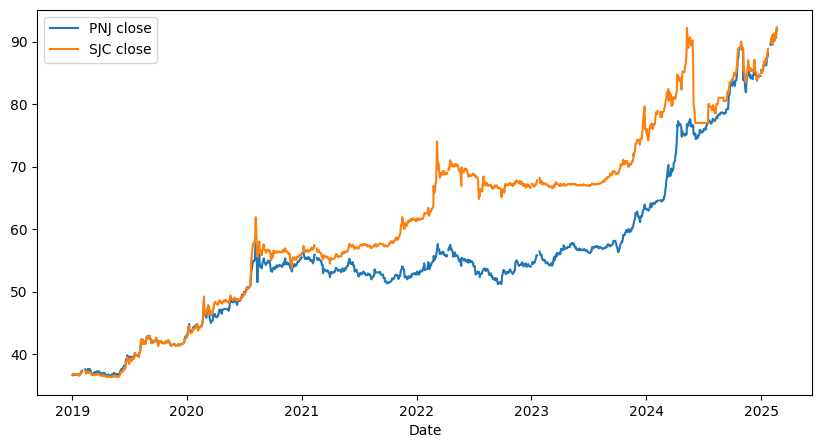

In [32]:
import pandas as pd 

link = r"https://docs.google.com/spreadsheets/d/e/2PACX-1vQxzmxnjv81baBSxDhGOR6eWEdAeRJrRJnMgLF8H-ctg6N1LDrqIX3Q3O0urcfImcQFbMeLrBxLk6wy/pub?gid=0&single=true&output=csv"
df = pd.read_csv(link).iloc[1 :, [1, 4, 5]]
df.columns = ["Date", "PNJ", "SJC"]
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df["PNJ close"] = df["PNJ"].str.strip().str.replace(r".*mua.*", "", regex=True).str.split(" ", expand=True)[1].astype('float')
df["SJC close"] = df["SJC"].str.strip().str.replace(r".*mua.*", "", regex=True).str.split(" ", expand=True)[1].astype('float')
# regex replace *mua* with empty string
df.plot(x="Date", y=["PNJ close", "SJC close"], figsize=(10, 5))

In [57]:
df_cp["GL LV1 Name"].unique()

array(['CP CCDC', 'CP KH TSCĐ', 'CP Nhân viên', 'CP vật liệu phụ',
       'CP Còn lại', 'CP Thuê ngoài', 'CP hành chính', 'CP chuyển tiền',
       'CP Marketing & Khuyến mãi', 'CP sửa chữa, bảo trì'], dtype=object)

In [74]:
df_cp = pd.concat([pd.read_csv(file, encoding='utf-8', sep=',', header=0) for file in files_CP])
df_cp["Month year"] = pd.to_datetime(df_cp["Month year"]).dt.to_period('M')

# create MaCH column with condition right 4 chartacters of cost center code if not null else right 4 characters of GL Account Code
df_cp["MaCH"] = df_cp["Cost Center Code"].fillna(df_cp["Plant Code"].astype('str')).astype('int').astype('str').str[-4:] \
    .replace('0000', 'P015').replace('9999', 'P015')


cols = ["Month year", "GL Account Code", "GL LV1 Name", "FM. Loc Amt", "PnL Name", "MaCH"]
gl_code_exl = 64110120 # list of GL Account Code
gl_code_range = [64100000, 64252100]

# filter data cols with gl_code_exl and in range gl_code_range
df_cp = df_cp[cols][(df_cp["GL Account Code"] != gl_code_exl) & (df_cp["GL Account Code"].between(gl_code_range[0], gl_code_range[1]))]

df_cp.head()

,Month year,GL Account Code,GL LV1 Name,FM. Loc Amt,PnL Name,MaCH
0,2022-01,64130110,CP CCDC,-552500.0,Chi phí bán hàng,1013
1,2022-01,64130140,CP CCDC,-4387500.0,Chi phí bán hàng,1013
2,2022-01,64140110,CP KH TSCĐ,-3336389.0,Chi phí bán hàng,1013
3,2022-01,64140130,CP KH TSCĐ,-1533889.0,Chi phí bán hàng,1013
4,2022-01,64110100,CP Nhân viên,-111131428.0,Chi phí bán hàng,1115


In [ ]:
# group by GL LV1 Name and Month year
df_cp[df_cp["Month year"]=="2025-01"].groupby(["GL LV1 Name", "Month year"])["FM. Loc Amt"].sum() / 1e9

GL LV1 Name                Month year
CP CCDC                    2025-01      -0.744826
CP Còn lại                 2025-01      -0.817176
CP KH TSCĐ                 2025-01      -0.211752
CP Marketing & Khuyến mãi  2025-01      -0.007248
CP Nhân viên               2025-01      -8.924364
CP Thuê ngoài              2025-01      -2.867169
CP chuyển tiền             2025-01      -0.529042
CP hành chính              2025-01      -0.442921
CP sửa chữa, bảo trì       2025-01      -1.238189
CP vật liệu phụ            2025-01      -0.493743
Name: FM. Loc Amt, dtype: float64

# Dthu

In [ ]:
import pandas as pd 
from glob import glob
import os
import requests
import streamlit as st
import helper
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# parquet = r"https://raw.githubusercontent.com/Huynh-Tr/report/main/dthu.parquet"
parquet = r"D:\pnj.com.vn\HuynhTN - Documents\Project\dthu.parquet"

def dthu():
    df = pd.read_parquet(parquet)
    df = df[df["Month year"] != "Month year"]
    df["Month year"] = pd.to_datetime(df["Month year"]).dt.to_period('M')
    df["Plant Code"] = df["Plant Code"].astype('str')
    # replace any text start with "Trang Sức Ý *" with "Trang Sức Ý" in column Product Group 4 Name 
    # df["Product Group 4 Name"] = df["Product Group 4 Name"].str.replace(r"TRANG SỨC Ý*", "TRANG SỨC Ý", regex=True)
    df["Product Group 4 Name"] = df["Product Group 4 Name"].str.replace(r"^TRANG SỨC Ý.*", "TRANG SỨC Ý", regex=True)
    lv2 = ["DÂY ĐỒNG HỒ", "MẮT KÍNH", "ĐỒNG HỒ"]
    lv3 = ["CAO"]
    lv4 = ["TRANH/TƯỢNG/BIỂU TƯỢNG", "VÀNG KHÔNG ÉP SIÊU", "VÀNG ÉP SIÊU PNJ", "VÀNG ÉP SIÊU SJC"]
    account_code = [51131000, 51132000]
    col = ["Product Group 2 Name", "Product Group 3 Name", "Product Group 4 Name", "Month year", \
        "Plant Code", "Channel Description", "FM 01_Invoices Revenue", "FM 07_Gross Profit"]

    df_tsv = df.copy()
    df_tsv = df_tsv[~df_tsv["Product Group 2 Name"].isin(lv2)]
    df_tsv = df_tsv[~df_tsv["Product Group 3 Name"].isin(lv3)]
    df_tsv = df_tsv[~df_tsv["Product Group 4 Name"].isin(lv4)]
    df_tsv = df_tsv[~df_tsv["GL Account Code"].isin(account_code)]
    df_tsv = df_tsv[col]

    df_vm = df.copy()
    df_vm = df_vm[df_vm["Product Group 4 Name"].isin(lv4)]
    df_vm = df_vm[col]

    return df_tsv, df_vm

def chitieu_theoky_plot(df, year, month, plant_code='Select All'):
    if plant_code == 'Select All':
        chitieu_th = df[(df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin(year))]
        chitieu_ck = df[(df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin([max(year) - 1]))]
        chitieu_lk = df[(df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin(year))]
        chitieu_ck_lk = df[(df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin([max(year) - 1]))]
    else:
        chitieu_th = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin(year))]
        chitieu_ck = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin([max(year) - 1]))]
        chitieu_lk = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin(year))]
        chitieu_ck_lk = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin([max(year) - 1]))]

    return chitieu_th, chitieu_ck, chitieu_lk, chitieu_ck_lk


df_tsv, vm = dthu()
chitieu_th, chitieu_ck, chitieu_lk, chitieu_ck_lk = chitieu_theoky_plot(df=df_tsv, year=[2024, 2025], month=range(1, 13), plant_code='Select All')
# chitieu_th

vm[vm["Month year"] == "2025-01"]["FM 07_Gross Profit"].sum() / 1e9
# for item in myplot.axes.get_xticklabels():
    # item.set_rotation(90)

# (chitieu_th.groupby(["Product Group 4 Name"])["FM 01_Invoices Revenue"].sum() / 1e9)[m].plot(kind='bar', color='blue', alpha=0.7)
# plt.show()

1.319636507

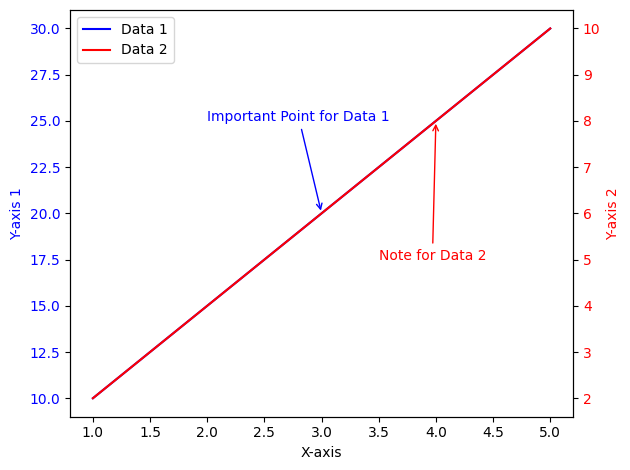

In [226]:
import matplotlib.pyplot as plt

# Sample Data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 20, 25, 30]
y2 = [2, 4, 6, 8, 10]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'b-', label='Data 1')
ax2.plot(x, y2, 'r-', label='Data 2')

ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis 1', color='b')
ax2.set_ylabel('Y-axis 2', color='r')

ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Annotations (Crucial: Specify the correct axes)

# Annotation for Data 1 (using ax1)
ax1.annotate("Important Point for Data 1", xy=(3, 20), xytext=(2, 25),
             arrowprops=dict(arrowstyle="->", color="blue"), color="blue")


# Annotation for Data 2 (using ax2)
ax2.annotate("Note for Data 2", xy=(4, 8), xytext=(3.5, 5),
             arrowprops=dict(arrowstyle="->", color="red"), color="red")


fig.tight_layout()
plt.show()

In [8]:
import pandas as pd 
from glob import glob
import os
import requests
import streamlit as st
import helper

import warnings
warnings.filterwarnings("ignore")

# parquet = r"https://raw.githubusercontent.com/Huynh-Tr/report/main/dthu.parquet"
parquet = r"D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\dthu.parquet"

def dthu():
    df = pd.read_parquet(parquet)
    df = df[df["Month year"] != "Month year"]
    df["Month year"] = pd.to_datetime(df["Month year"]).dt.to_period('M')
    df["Plant Code"] = df["Plant Code"].astype('str')
    lv2 = ["DÂY ĐỒNG HỒ", "MẮT KÍNH", "ĐỒNG HỒ"]
    lv3 = ["CAO"]
    lv4 = ["TRANH/TƯỢNG/BIỂU TƯỢNG", "VÀNG KHÔNG ÉP SIÊU", "VÀNG ÉP SIÊU PNJ", "VÀNG ÉP SIÊU SJC"]
    account_code = [51131000, 51132000]
    col = ["Product Group 2 Name", "Product Group 3 Name", "Product Group 4 Name", "Month year", \
        "Plant Code", "Channel Description", "FM 01_Invoices Revenue", "FM 07_Gross Profit"]

    df_tsv = df.copy()
    df_tsv = df_tsv[~df_tsv["Product Group 2 Name"].isin(lv2)]
    df_tsv = df_tsv[~df_tsv["Product Group 3 Name"].isin(lv3)]
    df_tsv = df_tsv[~df_tsv["Product Group 4 Name"].isin(lv4)]
    df_tsv = df_tsv[~df_tsv["GL Account Code"].isin(account_code)]
    df_tsv = df_tsv[col]

    df_vm = df.copy()
    df_vm = df_vm[df_vm["Product Group 4 Name"].isin(lv4)]
    df_vm = df_vm[col]

    return df_tsv, df_vm

def chitieu_theoky(df, col, year, month, plant_code):
    if plant_code == 'Select All':
        chitieu_th = df[(df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck = df[(df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9
        chitieu_lk = df[(df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck_lk = df[(df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9

    else:
        chitieu_th = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(month)) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9
        chitieu_lk = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin(year))][col].sum() / 1e9
        chitieu_ck_lk = df[(df["Plant Code"].isin(plant_code)) & (df["Month year"].dt.month.isin(range(1, max(month) + 1))) & (df["Month year"].dt.year.isin([max(year) - 1]))][col].sum() / 1e9

    return chitieu_th, chitieu_ck, chitieu_lk, chitieu_ck_lk

def chitieu(year, month, plant_code='Select All'):    
    data_tsv, data_vm = dthu()
    if plant_code == 'Select All':
        sum_fm_tsv01, sum_fm_tsv01_ck, sum_fm_tsv01_lk, sum_fm_tsv01_ck_lk = chitieu_theoky(df=data_tsv, col="FM 01_Invoices Revenue", year=year, month=month, plant_code=plant_code)
        sum_fm_vm01, sum_fm_vm01_ck, sum_fm_vm01_lk, sum_fm_vm01_ck_lk = chitieu_theoky(df=data_vm, col="FM 01_Invoices Revenue", year=year, month=month, plant_code=plant_code)                  
        sum_fm_tsv07, sum_fm_tsv07_ck, sum_fm_tsv07_lk, sum_fm_tsv07_ck_lk = chitieu_theoky(df=data_tsv, col="FM 07_Gross Profit", year=year, month=month, plant_code=plant_code)
        sum_fm_vm07, sum_fm_vm07_ck, sum_fm_vm07_lk, sum_fm_vm07_ck_lk = chitieu_theoky(df=data_vm, col="FM 07_Gross Profit", year=year, month=month, plant_code=plant_code)

    else:
        sum_fm_tsv01, sum_fm_tsv01_ck, sum_fm_tsv01_lk, sum_fm_tsv01_ck_lk = chitieu_theoky(df=data_tsv, col="FM 01_Invoices Revenue", year=year, month=month, plant_code=plant_code)
        sum_fm_vm01, sum_fm_vm01_ck, sum_fm_vm01_lk, sum_fm_vm01_ck_lk = chitieu_theoky(df=data_vm, col="FM 01_Invoices Revenue", year=year, month=month, plant_code=plant_code)                  
        sum_fm_tsv07, sum_fm_tsv07_ck, sum_fm_tsv07_lk, sum_fm_tsv07_ck_lk = chitieu_theoky(df=data_tsv, col="FM 07_Gross Profit", year=year, month=month, plant_code=plant_code)
        sum_fm_vm07, sum_fm_vm07_ck, sum_fm_vm07_lk, sum_fm_vm07_ck_lk = chitieu_theoky(df=data_vm, col="FM 07_Gross Profit", year=year, month=month, plant_code=plant_code)

    print('sum_fm_tsv01:', sum_fm_tsv01)
    result_dthu = pd.DataFrame(
        {
        'Chỉ Tiêu': ['Doanh thu', 'TSV', 'VM', 'Lãi Gộp', 'TSV', 'VM'],
        '': ['', '', '', '', '', ''],
        '  Thực Hiện  ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
        '  Cùng Kỳ    ': [(sum_fm_tsv01_ck + sum_fm_vm01_ck), (sum_fm_tsv01_ck), (sum_fm_vm01_ck), (sum_fm_tsv07_ck + sum_fm_vm07_ck), (sum_fm_tsv07_ck), (sum_fm_vm07_ck)],
        '  Kế Hoạch   ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
        ' ': ['', '', '', '', '', ''],
        ' LK Thực Hiện': [(sum_fm_tsv01_lk + sum_fm_vm01_lk), (sum_fm_tsv01_lk), (sum_fm_vm01_lk), (sum_fm_tsv07_lk + sum_fm_vm07_lk), (sum_fm_tsv07_lk), (sum_fm_vm07_lk)],
        ' LK Cùng Kỳ  ': [(sum_fm_tsv01_ck_lk + sum_fm_vm01_ck_lk), (sum_fm_tsv01_ck_lk), (sum_fm_vm01_ck_lk), (sum_fm_tsv07_ck_lk + sum_fm_vm07_ck_lk), (sum_fm_tsv07_ck_lk), (sum_fm_vm07_ck_lk)],
        ' LK Kế Hoạch ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
        '  ': ['', '', '', '', '', ''],
        'LK Thực Hiện ': [(sum_fm_tsv01_lk + sum_fm_vm01_lk), (sum_fm_tsv01_lk), (sum_fm_vm01_lk), (sum_fm_tsv07_lk + sum_fm_vm07_lk), (sum_fm_tsv07_lk), (sum_fm_vm07_lk)],
        '       KH Năm': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)]
        }
    )    

    return result_dthu

result_dthu = chitieu(year=[2025], month=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], plant_code='Select All')
result_dthu

sum_fm_tsv01: 213.283713898


,Chỉ Tiêu,,Thực Hiện,Cùng Kỳ,Kế Hoạch,,LK Thực Hiện,LK Cùng Kỳ,LK Kế Hoạch,,LK Thực Hiện,KH Năm
0,Doanh thu,,238.627999,2863.233029,238.627999,,238.627999,2863.233029,238.627999,,238.627999,238.627999
1,TSV,,213.283714,1999.337113,213.283714,,213.283714,1999.337113,213.283714,,213.283714,213.283714
2,VM,,25.344285,863.895916,25.344285,,25.344285,863.895916,25.344285,,25.344285,25.344285
3,Lãi Gộp,,52.620572,501.150738,52.620572,,52.620572,501.150738,52.620572,,52.620572,52.620572
4,TSV,,50.163577,461.260390,50.163577,,50.163577,461.260390,50.163577,,50.163577,50.163577
5,VM,,2.456995,39.890348,2.456995,,2.456995,39.890348,2.456995,,2.456995,2.456995


In [ ]:
import pandas as pd 
from glob import glob
import os
import requests

import warnings
warnings.filterwarnings("ignore")

parquet = r"https://raw.githubusercontent.com/Huynh-Tr/report/main/dthu.parquet"

def dthu():
    df = pd.read_parquet(parquet)
    df = df[df["Month year"] != "Month year"]
    df["Month year"] = pd.to_datetime(df["Month year"]).dt.to_period('M')
    lv2 = ["DÂY ĐỒNG HỒ", "MẮT KÍNH", "ĐỒNG HỒ"]
    lv3 = ["CAO"]
    lv4 = ["TRANH/TƯỢNG/BIỂU TƯỢNG", "VÀNG ÉP SIÊU PNJ", "VÀNG ÉP SIÊU SJC"]
    account_code = [51131000, 51132000]
    col = ["Product Group 2 Name", "Product Group 3 Name", "Product Group 4 Name", "Month year", \
        "Plant Code", "Channel Description", "FM 01_Invoices Revenue", "FM 07_Gross Profit"]

    df_tsv = df.copy()
    df_tsv = df_tsv[~df_tsv["Product Group 2 Name"].isin(lv2)]
    df_tsv = df_tsv[~df_tsv["Product Group 3 Name"].isin(lv3)]
    df_tsv = df_tsv[~df_tsv["Product Group 4 Name"].isin(lv4)]
    df_tsv = df_tsv[~df_tsv["GL Account Code"].isin(account_code)]
    df_tsv = df_tsv[col]

    df_vm = df.copy()
    df_vm = df_vm[df_vm["Product Group 4 Name"].isin(lv4)]
    df_vm = df_vm[col]

    return df_tsv, df_vm

month = [5]
year = [2024]
def chitieu(year=year, month=month, plant_code='Select All'):    
    data_tsv, data_vm = dthu()
    if plant_code == 'Select All':
        sum_fm_tsv01 = data_tsv[(data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01 = data_vm[(data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07 = data_tsv[(data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07 = data_vm[(data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9

        # lk
        sum_fm_tsv01_lk = data_tsv[(data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01_lk = data_vm[(data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07_lk = data_tsv[(data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07_lk = 0 # data_vm[(data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9

        # ck
        sum_fm_tsv01_ck = data_tsv[(data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01_ck = data_vm[(data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07_ck = data_tsv[(data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07_ck = data_vm[(data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9

        # lk ck
        sum_fm_tsv01_lk_ck = data_tsv[(data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01_lk_ck = data_vm[(data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07_lk_ck = data_tsv[(data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07_lk_ck = data_vm[(data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9
        
    else:
        sum_fm_tsv01 = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01 = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07 = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07 = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9

        # lk
        sum_fm_tsv01_lk = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01_lk = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin(year))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07_lk = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07_lk = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin(year))]["FM 07_Gross Profit"].sum() / 1e9

        # ck
        sum_fm_tsv01_ck = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01_ck = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07_ck = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(month)) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07_ck = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(month)) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9

        # lk ck
        sum_fm_tsv01_lk_ck = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_vm01_lk_ck = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 01_Invoices Revenue"].sum() / 1e9
        sum_fm_tsv07_lk_ck = data_tsv[(data_tsv["Plant Code"].isin(plant_code)) & (data_tsv["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_tsv["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9
        sum_fm_vm07_lk_ck = data_vm[(data_vm["Plant Code"].isin(plant_code)) & (data_vm["Month year"].dt.month.isin(range(1, max(month) + 1))) & (data_vm["Month year"].dt.year.isin([max(year) - 1]))]["FM 07_Gross Profit"].sum() / 1e9

    result_dthu = pd.DataFrame(
        {
        'Chỉ Tiêu': ['Doanh thu', 'TSV', 'VM', 'Lãi Gộp', 'TSV', 'VM'],
        '': ['', '', '', '', '', ''],
        '  Thực Hiện  ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
        '  Cùng Kỳ    ': [(sum_fm_tsv01_ck + sum_fm_vm01_ck), (sum_fm_tsv01_ck), (sum_fm_vm01_ck), (sum_fm_tsv07_ck + sum_fm_vm07_ck), (sum_fm_tsv07_ck), (sum_fm_vm07_ck)],
        '  Kế Hoạch   ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
        ' ': ['', '', '', '', '', ''],
        ' LK Thực Hiện': [(sum_fm_tsv01_lk + sum_fm_vm01_lk), (sum_fm_tsv01_lk), (sum_fm_vm01_lk), (sum_fm_tsv07_lk + sum_fm_vm07_lk), (sum_fm_tsv07_lk), (sum_fm_vm07_lk)],
        ' LK Cùng Kỳ  ': [(sum_fm_tsv01_lk_ck + sum_fm_vm01_lk_ck), (sum_fm_tsv01_lk_ck), (sum_fm_vm01_lk_ck), (sum_fm_tsv07_lk_ck + sum_fm_vm07_lk_ck), (sum_fm_tsv07_lk_ck), (sum_fm_vm07_lk_ck)],
        ' LK Kế Hoạch ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
        '  ': ['', '', '', '', '', ''],
        'LK Thực Hiện ': [(sum_fm_tsv01_lk + sum_fm_vm01_lk), (sum_fm_tsv01_lk), (sum_fm_vm01_lk), (sum_fm_tsv07_lk + sum_fm_vm07_lk), (sum_fm_tsv07_lk), (sum_fm_vm07_lk)],
        '       KH Năm': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)]
        }
    )    

    return result_dthu

    # return sum_fm_tsv01, sum_fm_vm01, sum_fm_tsv07, sum_fm_vm07, sum_fm_tsv01_lk, sum_fm_vm01_lk, sum_fm_tsv07_lk, sum_fm_vm07_lk, \
    #     sum_fm_tsv01_ck, sum_fm_vm01_ck, sum_fm_tsv07_ck, sum_fm_vm07_ck, sum_fm_tsv01_lk_ck, sum_fm_vm01_lk_ck, sum_fm_tsv07_lk_ck, sum_fm_vm07_lk_ck
    

result_dthu = chitieu(year, month, plant_code='Select All')

# result_dthu = pd.DataFrame(
#     {
#         'Chỉ Tiêu': ['Doanh thu', 'TSV', 'VM', 'Lãi Gộp', 'TSV', 'VM'],
#         '': ['', '', '', '', '', ''],
#         '  Thực Hiện  ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
#         '  Cùng Kỳ    ': [(sum_fm_tsv01_ck + sum_fm_vm01_ck), (sum_fm_tsv01_ck), (sum_fm_vm01_ck), (sum_fm_tsv07_ck + sum_fm_vm07_ck), (sum_fm_tsv07_ck), (sum_fm_vm07_ck)],
#         '  Kế Hoạch   ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
#         ' ': ['', '', '', '', '', ''],
#         ' LK Thực Hiện': [(sum_fm_tsv01_lk + sum_fm_vm01_lk), (sum_fm_tsv01_lk), (sum_fm_vm01_lk), (sum_fm_tsv07_lk + sum_fm_vm07_lk), (sum_fm_tsv07_lk), (sum_fm_vm07_lk)],
#         ' LK Cùng Kỳ  ': [(sum_fm_tsv01_lk_ck + sum_fm_vm01_lk_ck), (sum_fm_tsv01_lk_ck), (sum_fm_vm01_lk_ck), (sum_fm_tsv07_lk_ck + sum_fm_vm07_lk_ck), (sum_fm_tsv07_lk_ck), (sum_fm_vm07_lk_ck)],
#         ' LK Kế Hoạch ': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)],
#         '  ': ['', '', '', '', '', ''],
#         'LK Thực Hiện ': [(sum_fm_tsv01_lk + sum_fm_vm01_lk), (sum_fm_tsv01_lk), (sum_fm_vm01_lk), (sum_fm_tsv07_lk + sum_fm_vm07_lk), (sum_fm_tsv07_lk), (sum_fm_vm07_lk)],
#         '       KH Năm': [(sum_fm_tsv01 + sum_fm_vm01), (sum_fm_tsv01), (sum_fm_vm01), (sum_fm_tsv07 + sum_fm_vm07), (sum_fm_tsv07), (sum_fm_vm07)]
#     }
# )

result_dthu

,Chỉ Tiêu,,Thực Hiện,Cùng Kỳ,Kế Hoạch,,LK Thực Hiện,LK Cùng Kỳ,LK Kế Hoạch,,LK Thực Hiện,KH Năm
0,Doanh thu,,237.873087,163.734388,237.873087,,1.461734e+03,1041.408330,237.873087,,1.461734e+03,237.873087
1,TSV,,129.918365,121.280052,129.918365,,8.400183e+02,728.988884,129.918365,,8.400183e+02,129.918365
2,VM,,107.954721,42.454336,107.954721,,6.217155e+02,312.419446,107.954721,,6.217155e+02,107.954721
3,Lãi Gộp,,35.864402,30.470322,35.864402,,3.136414e+10,186.195150,35.864402,,3.136414e+10,35.864402
4,TSV,,30.156581,29.107980,30.156581,,1.993522e+02,175.919728,30.156581,,1.993522e+02,30.156581
5,VM,,5.707821,1.362342,5.707821,,3.136414e+10,10.275422,5.707821,,3.136414e+10,5.707821


In [45]:
max([1, 2, 4]) + 1

5

# Parquet

In [2]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from glob import glob  # For handling multiple CSV files
import os

In [156]:
path = "D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"

csv_files = glob(os.path.join(path, "Dthu\\*.csv"))  # Get all CSV files in the directory
# create a directory to save parquet files
if not os.path.exists(os.path.join(path, ".\parquet_files")):
    os.makedirs(os.path.join(path, ".\parquet_files"))

parquet_directory = os.path.join(path, "dthu_parquet_files")

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    table = pa.Table.from_pandas(df)

    # Create parquet filename based on csv filename:
    parquet_file = parquet_directory + "\\" + os.path.basename(csv_file).replace('.csv', '.parquet')

    pq.write_table(table, parquet_file)


In [ ]:


# if not os.path.exists(os.path.join(path, ".\parquet_files")):
#     os.makedirs(os.path.join(path, ".\parquet_files"))

# parquet_directory = os.path.join(path, "parquet_files\\file.parquet")

import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from glob import glob
import os

def csv_to_parquet_append_legacy(csv_files, parquet_file):  # Legacy method
     if not os.path.exists(parquet_file):
         try:
             first_df = pd.read_csv(csv_files)
             table = pa.Table.from_pandas(first_df)
             pq.write_table(table, parquet_file)
         except FileNotFoundError:
             print(f"Error: First CSV file '{csv_files}' not found. Cannot create Parquet file.")
             return
         except Exception as e:
             print(f"Error creating initial Parquet file: {e}")
             return

     for csv_file in csv_files:
         try:
             df = pd.read_csv(csv_file)
             table = pa.Table.from_pandas(df)

             if os.path.exists(parquet_file):  # Read existing Parquet file
                 existing_table = pq.read_table(parquet_file)
                 combined_table = pa.concat_tables([existing_table, table]) # Concatenate tables
                 pq.write_table(combined_table, parquet_file) # Write combined table back

             else: #If file doesn't exist, write the table directly
                 pq.write_table(table, parquet_file)

         except FileNotFoundError:
             print(f"Error: CSV file '{csv_file}' not found.")
         except pa.lib.ArrowInvalid as e:
             print(f"Error converting CSV to Parquet: {e}. Check data types for file: {csv_file}")
         except Exception as e:
             print(f"An unexpected error occurred while processing {csv_file}: {e}")

# Example usage:
path = "D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"
csv_files = glob(os.path.join(path, "Dthu\\*.csv"))  # Get all CSV files in the directory

parquet_file = 'output.parquet'  # Replace with your desired Parquet file path

csv_to_parquet_append(csv_files, parquet_file)

print(f"CSV files appended to Parquet file: {parquet_file}")

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\huynh.th\AppData\Local\Temp\ipykernel_32680\2253336765.py:48: SyntaxWarning: invalid escape sequence '\p'
  path = "D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"


An unexpected error occurred while processing D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\Dthu\202101.csv: __cinit__() got an unexpected keyword argument 'append'
An unexpected error occurred while processing D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\Dthu\202102.csv: __cinit__() got an unexpected keyword argument 'append'
An unexpected error occurred while processing D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\Dthu\202103.csv: __cinit__() got an unexpected keyword argument 'append'
An unexpected error occurred while processing D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\Dthu\202104.csv: __cinit__() got an unexpected keyword argument 'append'
An unexpected error occurred while processing D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\Dthu\202105.csv: __cinit__() got an unexpected keyword argument 'append'
An unexpected error occurred while processing D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit\Dthu\202106.csv: __cinit__() got an unexpected 

In [13]:
# create an empty parquet file
import pyarrow as pa
import pyarrow.parquet as pq

# Create an Arrow table with an empty schema
parquet_file = 'output.parquet'
table = pa.Table.from_pandas(pd.DataFrame())
pq.write_table(table, parquet_file)

In [47]:
import pyarrow as pa
import pyarrow.parquet as pq

# Create an Arrow table with an empty schema
parquet_file = 'output.parquet'
table = pa.Table.from_pandas(pd.DataFrame())
# pq.write_table(table, parquet_file)

# Path = "D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"
path = "D:\pnj.com.vn\HuynhTN - Documents\Project\streamlit"
csv_files = glob(os.path.join(path, "Dthu\\*.csv"))  # Get all CSV files in the directory

pd_df = pd.concat([pd.read_csv(csv_file) for csv_file in csv_files])
table = pa.Table.from_pandas(pd_df)
pq.write_table(table, parquet_file)